

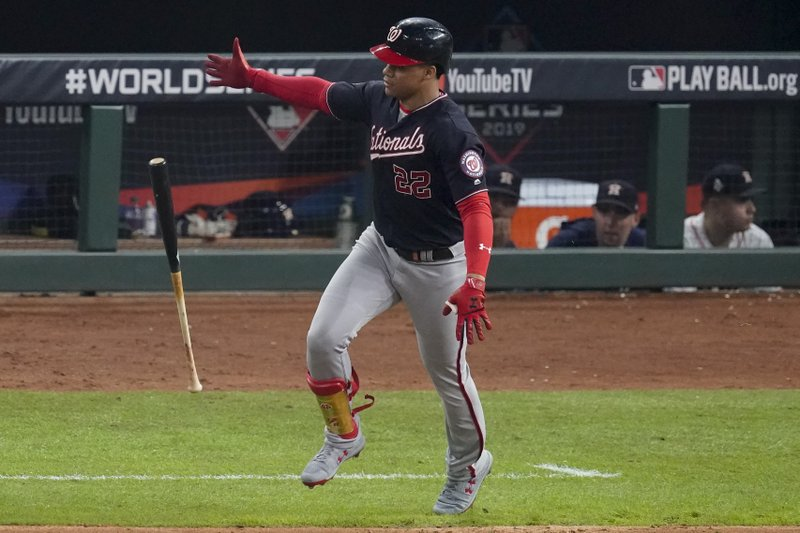

#Dropping the Bat: How 3-True-Outcome Hitting Has Changed Baseball's Offensive Landscape
In recent years, while the offensive objective of a Major League Baseball team—to score as many runs as possible—has not changed, much about how teams go about generating runs has. As data continues to become a bigger and bigger part of professional sports, many presidents, GMs and managers are letting data drive their decision making—particularly in baseball.

\
"The 3 true outcomes"—strikeouts, walks and home runs—is a rising term in the baseball world. For many hitters, these results make up almost all of their plate appearances, leaving little room for alternate strategies at the plate. I intend to explain why this is so, and why many 3 true outcome players find themselves on MLB rosters today.


# Cumulative League Stats

Below is a table showing an array of statistics from every year in MLB's history, courtesy of [Baseball Reference](https://www.baseball-reference.com/leagues/majors/bat.shtml?sr&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool#teams_standard_batting_totals). I will be using these numbers to show how offense has changed over the years.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

alltime_stats_URL = "/content/drive/MyDrive/Baseball.csv"
alltime_stats = pd.read_csv(alltime_stats_URL)
alltime_stats[alltime_stats.Year != 2020]

,Year,R/G,G,R,H,2B,HR,RBI,BB,SO,BA,OBP,SLG,OPS,SH,SF
0,2021,4.53,4858,22010,39484,7863,5944,20993,15794,42145,0.244,0.317,0.411,0.728,766.0,1143.0
2,2019,4.83,4858,23467,42039,8531,6776,22471,15895,42823,0.252,0.323,0.435,0.758,776.0,1150.0
3,2018,4.45,4862,21630,41018,8264,5585,20606,15686,41207,0.248,0.318,0.409,0.728,823.0,1235.0
4,2017,4.65,4860,22582,42215,8397,6105,21558,15829,40104,0.255,0.324,0.426,0.750,925.0,1168.0
5,2016,4.48,4856,21744,42276,8254,5610,20745,15088,38982,0.255,0.322,0.417,0.739,1025.0,1214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1875,6.14,690,4234,6812,839,40,2710,249,675,0.254,0.261,0.310,0.571,NaN,NaN
147,1874,7.48,464,3470,5224,634,40,2252,238,357,0.273,0.282,0.333,0.616,NaN,NaN
148,1873,8.99,398,3580,4926,570,47,2331,335,278,0.290,0.304,0.357,0.661,NaN,NaN
149,1872,9.26,366,3390,4467,581,37,2132,263,265,0.285,0.297,0.348,0.645,NaN,NaN


First let's look at sacrifice hits (commonly known as sacrifice bunts), defined by Baseball Reference as a play in which the batter is able to advance one or more runners by bunting the ball for an out. See an extended definition [here](https://www.baseball-reference.com/bullpen/Sacrifice_hit#:~:text=A%20sacrifice%20hit%20(also%20known,as%20a%20time%20at%20bat.).


The strategy of sac bunting, or 'small ball,' is largely dead in the MLB today. Here's the number of league-wide sac bunts per year since 2000 (excluding the COVID-shortened 2020 season):

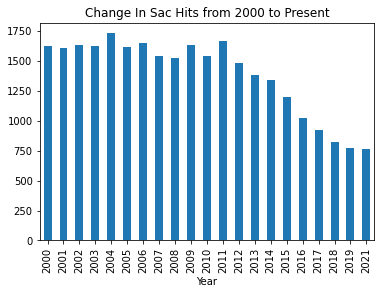

In [ ]:

By_year = alltime_stats[alltime_stats.Year != 2020]
SH_by_year = By_year.groupby('Year').sum()
SH_by_year = SH_by_year['SH']
SH_by_year = SH_by_year.sort_index().tail(21)

SH_by_year.plot.bar(title='Change In Sac Hits from 2000 to Present')



As shown above, since around 2011, sac hits have been becoming more and more of a rarity each season. But why is the strategy changing? Why aren't managers calling for sac bunts, and why are hitting coaches leaving the sac bunt out of their training?

\
The sac bunt has been historically considered a "safe" play; the likelihood of striking out or popping out, and thus failing to advance a runner on base into scoring position (making it easier for them to be driven in on a hit soon after) is certainly lowered when attempting a bunt. Might it instead be worth the risk to let players swing the bat, giving them a chance to advance or score the runner on a hit?





---

# Hard Hit %
One way to measure the quality of a batter's contact is exit velocity, the velocity at which the ball leaves the bat after contact. According to [mlb.com](https://www.mlb.com/glossary/statcast/hard-hit-rate), a "hard hit" ball is defined as a ball with an exit velocity of 95 mph or higher. 

\
Let's look at the league-wide hard hit % (percentage of batted balls with an EV of 95 mph or higher) from 2011-2019:

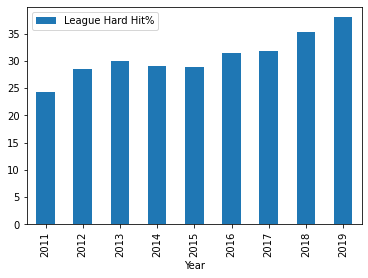

In [ ]:
hard_hit = pd.DataFrame([[2011,24.3],[2012,28.5],[2013,29.9],[2014,29.1],[2015,28.8],[2016,31.4],[2017,31.8],[2018,35.3],[2019,38]], columns=['Year','League Hard Hit%'])
hard_hit.plot.bar(x='Year',y='League Hard Hit%')

So batters are hitting the ball harder—so what? As it turns out, the 95 mph threshold is far from arbitrary. Here's a short comparison between the result of batted balls above 95 mph EV, below 95 mph EV, and the league averages in 2018, per MLB:

In [ ]:
EV_comp = pd.DataFrame([[.524,1.047],[.219,.259],[.248,.409]],index=['>95 mph','<95 mph','League avg.'],columns=['BA','SLG'])
EV_comp

,BA,SLG
>95 mph,0.524,1.047
<95 mph,0.219,0.259
League avg.,0.248,0.409


Batting Average (BA) measures the amount of times a player gets a hit divided by their number of at-bats, and Slugging Percentage (SLG) measures how many bases a player averages per at-bat. 

Therefore, hard hit balls produce almost 0.8 more bases per at-bat and result in a hit over 30% more of the time compared to weakly hit balls. So with the recent rise in hard hit %, hitting coaches and managers are incentivized by likely offensive success to let their players swing the bat.





---
# Strikeouts

Likely as a result of a rising free-swing environment, strikeout numbers have also risen. Here's how league strikeout per game averages have changed from 2011-2019:


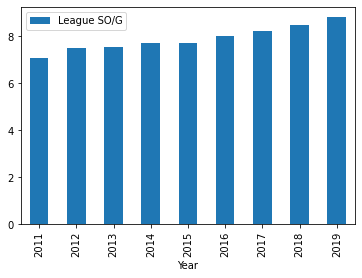

In [ ]:
strikeouts = pd.DataFrame([[2011,7.1],[2012,7.5],[2013,7.55],[2014,7.7],[2015,7.71],[2016,8.03],[2017,8.25],[2018,8.48],[2019,8.81]], columns=['Year','League SO/G'])

strikeouts.plot.bar(x='Year',y='League SO/G')

Should this concern hitting coaches? Here's the strikout totals for each team and their corresponding runs per game numbers this past year:


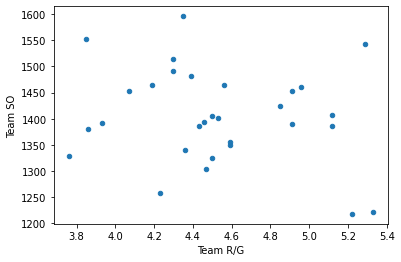

In [ ]:
teams_current = pd.DataFrame(data={'Team R/G':[4.19,4.91,4.07,5.12,4.35,4.91,4.85,4.43,4.59,4.3,5.33,4.23,4.46,5.12,3.85,4.56,4.5,3.93,4.39,4.59,4.53,3.76,4.5,4.3,4.96,4.36,5.29,3.86,5.22,4.47], 'Team OBP':[.309,.319,.304,.328,.312,.336,.328,.303,.317,.308,.339,.306,.310,.330,.298,.317,.314,.315,.322,.317,.318,.309,.321,.303,.329,.313,.321,.294,.330,.337],'Team SO':[1465,1453,1454,1386,1596,1389,1425,1387,1356,1514,1222,1258,1394,1408,1553,1465,1405,1392,1482,1349,1402,1328,1324,1492,1461,1341,1542,1381,1218,1303]})
teams_current.plot.scatter(y='Team SO',x='Team R/G')


Why wouldn't teams swing free when striking out more seems to correlate little to less offensive success?




---
# On Base Percentage

Of course, however, manager's would rather see their players walking toward first base after a walk than towards the dugout after a strikeout. In fact, the walk, while still as common as it has been for the last 40 years, is seemingly becoming a bigger part of teams' offensive success.

\
On Base Percentage  measures the percentage of plate appearances in which a player reaches a base, whether it be by way of a walk or a hit. Here's the OBP for each team and their corresponding runs per game numbers this past year:


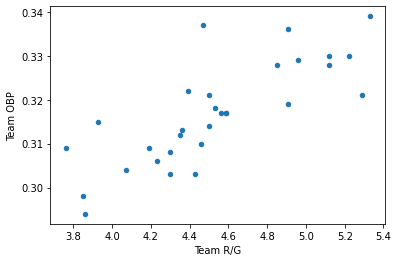

In [ ]:
teams_current.plot.scatter(y='Team OBP',x='Team R/G')

The correlation between reaching base and scoring runs is undeniable, unlike the effect of team strikeout numbers.

However, as batters swing more freely and strikeout more, less of this OBP is made up of hits—batters are hitting the ball harder when they make contact, but they are missing more than ever.

Thus, the walk has become a crucial way of reaching base and therefore producing runs.



---

# Conclusion

The rising prominence of 3-true-outcome hitters isn't so difficult to recognize, even just by consulting standard metrics. Diving deeper into more advanced numbers could offer more insight as to why managers are beginning to implement such players into their lineups—should you decide to do so, I highly reccomend using [Baseball Reference](https://www.baseball-reference.com/), [FanGraphs](https://www.fangraphs.com/) and [Baseball Savant](https://baseballsavant.mlb.com/) to help you out. 

\
As statistics become more accurate, advanced and involved in the sport of baseball, MLB will continue to change according to the feedback given by the data. Thankfully, in the thick of a tense MLB lockout, without the ability to watch their favorite teams and players compete on the field, baseball fans have PLENTY of data to occupy them. 

\

So as we wait for America's pastime to return, consider taking some time to catch up on the nuances of today's data-driven game and prepare for what you'll see when it reaches the diamond once again.